In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import itertools
from shapely.geometry import Point, LineString
import seaborn as sns
#pd.set_option('display.max_rows', 100)
#plt.style.use('')
import numpy as np
import re


In [2]:
user = "ManuBenito"

In [3]:
rootdir = r"C:\Users\{current_user}\Documents\Walknet-DataLake\sources\spain\mobility\edm2018\level0\trips\{excel_file}.xlsx"

## Viajes

In [4]:
viajes = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018VIAJES"), 
                                      sheet_name='VIAJES',
                                      dtype ={'ID_HOGAR': int,
                                              'ID_IND': int,
                                              'ID_VIAJE': int,
                                              'VORI': int,
                                              'VORIHORAINI': int,
                                              'VDES': int,
                                              'VDESHORAFIN': int,
                                              'VFRECUENCIA': int,
                                              'VVEHICULO': float,
                                              'VNOPRIVADO': float,
                                              'VNOPUBLICO': float,
                                              'VORIZT1259': str,
                                              'VDESZT1259': str,
                                              'TIPO_ENCUESTA': str,
                                              'N_ETAPAS_POR_VIAJE': int,
                                              'MOTIVO_PRIORITARIO': int,
                                              'DISTANCIA_VIAJE': float,
                                              'MODO_PRIORITARIO': int,
                                              'ELE_G_POND_ESC2': float})

In [5]:
ley_viajes = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018VIAJES"),
                                          sheet_name = 'LIBRO DE CODIGOS')

In [6]:
ley_viajes = ley_viajes[['VARIABLE','VALORES']].dropna(how='all')

In [7]:
ley_viajes.fillna("",inplace=True)
ley_viajes['VALORES'] = ley_viajes['VALORES'].str.replace('\xa0\xa0\xa0 ','')

In [8]:
ley_viajes_values = {}
for i,r in ley_viajes.iterrows():
    values = []
    if r['VARIABLE']!='' and r['VALORES'] == '':
        pass
    elif r['VARIABLE']!='' and r['VALORES'] != '':
        variable = r['VARIABLE']
        ley_viajes_values.update({variable:[]})
        ley_viajes_values[variable].append(r['VALORES'])
    else:
        ley_viajes_values[variable].append(r['VALORES'])
        
for k,v in ley_viajes_values.items():
    ley_viajes_values[k] = {el.split(".",1)[0]:el.split(".",1)[1].strip() for el in v}
for k,v in ley_viajes_values.items():
    if all(e.isdigit() for e in v.keys()):
        ley_viajes_values[k] = {int(y):a for y,a in v.items()}
    else:
        ley_viajes_values[k] = {int(y.split(" ",1)[0]):a[:-1].strip() for y,a in v.items()}

In [9]:
for c in [x for x in viajes.columns if x in ley_viajes_values.keys()]:
    viajes[c] = viajes[c].replace(ley_viajes_values[c])

## Individuos

In [10]:
individuos = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018INDIVIDUOS"),
                           sheet_name='INDIVIDUOS')

In [11]:
ley_individuos = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018INDIVIDUOS"),
                               sheet_name='LIBRO DE CODIGOS',
                               header=0, skiprows=[1,2])

In [12]:
ley_individuos = ley_individuos[['VARIABLE','VALORES']].dropna(how='all')

In [13]:
ley_individuos.fillna("",inplace=True)

In [14]:
ley_individuos_values = {}
for i,r in ley_individuos.iterrows():
    values = []
    if r['VARIABLE']!='' and r['VALORES'] == '':
        pass
    elif r['VARIABLE']!='' and r['VALORES'] != '':
        variable = r['VARIABLE']
        ley_individuos_values.update({variable:[]})
        ley_individuos_values[variable].append(r['VALORES'])
    else:
        ley_individuos_values[variable].append(r['VALORES'])
        
for k,v in ley_individuos_values.items():
    ley_individuos_values[k] = {el.split(".",1)[0]:el.split(".",1)[1].strip() for el in v}

In [15]:
for k,v in ley_individuos_values.items():
    ley_individuos_values[k] = {int(y):a for y,a in v.items()}

In [16]:
for c in [x for x in individuos.columns if x in ley_individuos_values.keys()]:
    individuos[c] = individuos[c].replace(ley_individuos_values[c])

## Hogares

In [17]:
hogares = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018HOGARES"),
                        sheet_name='HOGARES')

In [18]:
hogares.columns

Index(['ID_HOGAR', 'CODMUNI', 'NOMMUNI', 'CODPROV', 'NOMPROV', 'ZT1259',
       'CZ208', 'ELE_HOGAR_NUEVO', 'TIPO_ENCUESTA', 'A1PER', 'A2PER4', 'B1NVE',
       'V1B11TIPO', 'V1B12CARB', 'V1B13EST', 'V2B11TIPO1', 'V2B12CARB1',
       'V2B13EST1', 'V3B11TIPO1', 'V3B12CARB1', 'V3B13EST1', 'V4B11TIPO1',
       'V4B12CARB1', 'V4B13EST1', 'V5B11TIPO1', 'V5B12CARB1', 'V5B13EST1',
       'N_MIEMBROS_POR_HOGAR', 'N_VIAJES_POR_HOGAR'],
      dtype='object')

In [19]:
ley_hogares = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018HOGARES"),
                            sheet_name='LIBRO DE CODIGOS')

In [20]:
ley_hogares = ley_hogares[['VARIABLE','VALORES']].dropna(how='all')

In [21]:
ley_hogares.fillna("",inplace=True)

In [22]:
ley_hogares_values = {}
for i,r in ley_hogares.iterrows():
    values = []
    if r['VARIABLE']!='' and r['VALORES'] == '':
        pass
    elif r['VARIABLE']!='' and r['VALORES'] != '':
        variable = r['VARIABLE']
        ley_hogares_values.update({variable:[]})
        ley_hogares_values[variable].append(r['VALORES'])
    else:
        ley_hogares_values[variable].append(r['VALORES'])
        
for k,v in ley_hogares_values.items():
    ley_hogares_values[k] = {el.split(".",1)[0]:el.split(".",1)[1].strip() for el in v}

In [23]:
for k,v in ley_hogares_values.items():
    ley_hogares_values[k] = {int(y):a for y,a in v.items()}

In [24]:
for c in [x for x in hogares.columns if x in ley_hogares_values.keys()]:
    hogares[c] = hogares[c].replace(ley_hogares_values[c])

In [25]:
hogares.fillna(0,inplace=True)

## Etapas

In [26]:
etapas = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018XETAPAS"),
                       sheet_name = 'ETAPAS')

In [27]:
ley_etapas = pd.read_excel(rootdir.format(current_user = user, excel_file = "EDM2018XETAPAS"),
                           sheet_name = 'DATOSEDM2018LIBRO DE CODIGOS')

In [28]:
ley_etapas=ley_etapas[['VARIABLE','VALORES']].dropna(how='all')

In [29]:
ley_etapas.fillna("",inplace=True)

In [30]:
ley_etapas_values = {}
for i,r in ley_etapas.iterrows():
    values = []
    if r['VARIABLE']!='' and r['VALORES'] == '':
        pass
    elif r['VARIABLE']!='' and r['VALORES'] != '':
        variable = r['VARIABLE']
        ley_etapas_values.update({variable:[]})
        ley_etapas_values[variable].append(r['VALORES'])
    else:
        ley_etapas_values[variable].append(r['VALORES'])       

In [31]:
def make_replacement(string,d):
    pat = '|'.join(r"\b{}\b".format(x) for x in d.keys())
    a = re.sub(pat, lambda x: d.get(x.group(0)), string)
    return a
d = {'.\xa0 ':" ",'.\xa0\xa0':" ",'.\xa0\xa0\xa0\xa0\xa0 ':" ",".\xa0\xa0\xa0":" "}

In [32]:
for k,v in ley_etapas_values.items():
    ley_etapas_values[k] = [make_replacement(el,d) for el in v]

In [33]:
for k,v in ley_etapas_values.items():
    dd = {}
    for el in v:
        num = re.findall('^\d+',el.strip())[0]
        poss = [e for e in re.split('^\d+ ',el.strip()) if e!=''][0]
        if poss[0] == "'":
            poss = re.split("\d+. ",poss.strip())[1]
            poss = poss.replace(" '","")
            poss = poss.replace("'","")
            dd[int(num)] = poss
        elif poss[0].isdigit():
            poss = re.split("\d+. ",poss.strip())[1]
            poss = poss.replace(" '","")
            poss = poss.replace("'","")
            dd[int(num)] = poss
        else:
            dd[int(num)] = poss.strip()
    ley_etapas_values[k] = dd

In [34]:
for c in [x for x in etapas.columns if x in ley_etapas_values.keys()]:
    etapas[c] = etapas[c].replace(ley_etapas_values[c])

In [35]:
etapas.columns

Index(['ID_HOGAR', 'ID_IND', 'ID_VIAJE', 'ID_ETAPA', 'EMODO', 'EMODO1',
       'MODO_PRIORITARIO', 'MODO', 'ELINEAEMPRESA_ORIGINAL', 'ESUBIDA',
       'ESUBIDA_cod', 'EBAJADA', 'EBAJADA_cod', 'ETITULO', 'EESTACIONA',
       'EOCUPACION', 'ETDESPH', 'TIPO_ENCUESTA', 'COD_MUN_PARADA',
       'ELE_G_POND_Esc2'],
      dtype='object')

In [36]:
data = pd.merge(etapas,viajes,on=['ID_HOGAR','ID_IND','ID_VIAJE'],how='left',suffixes=("","_x"))
data = data[[c for c in data.columns if not c.endswith("_x")]]

In [37]:
data = pd.merge(individuos,data,on=['ID_HOGAR','ID_IND'],how='right',suffixes=("","_x"))
data = data[[c for c in data.columns if not c.endswith("_x")]]

In [38]:
data = pd.merge(hogares,data,on=['ID_HOGAR'],how='left',suffixes=("","_x"))
data = data[[c for c in data.columns if not c.endswith("_x")]]

In [39]:
for c in data.columns:
    if data[c].dtype == str:
        data[c] = data[c].fillna("")
    else:
        data[c] = data[c].fillna(0)    

In [40]:
#data.set_index(['ID_HOGAR','ID_IND','ID_VIAJE'],inplace=True)

In [41]:
#data.to_csv(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\mobility\edm2018\level1\level1_edm2018_con_etapas.csv",sep=";")

In [42]:
data = pd.read_csv(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\mobility\edm2018\level1\level1_edm2018.csv",sep=";")

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228414 entries, 0 to 228413
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            228414 non-null  int64  
 1   ID_HOGAR              228414 non-null  int64  
 2   CODMUNI               228414 non-null  int64  
 3   NOMMUNI               228414 non-null  object 
 4   CODPROV               228414 non-null  int64  
 5   NOMPROV               228414 non-null  object 
 6   ZT1259                228414 non-null  object 
 7   CZ208                 228414 non-null  int64  
 8   ELE_HOGAR_NUEVO       228414 non-null  float64
 9   TIPO_ENCUESTA         228414 non-null  object 
 10  A1PER                 228414 non-null  int64  
 11  A2PER4                228414 non-null  int64  
 12  B1NVE                 228414 non-null  int64  
 13  V1B11TIPO             228414 non-null  object 
 14  V1B12CARB             228414 non-null  object 
 15  

In [44]:
len(data)

228414

In [45]:
data.MODO_PRIORITARIO.unique()

array(['Coche conductor particular', 'Andando/pie', 'Autobus interurbano',
       'Autobus discrecional', 'Coche pasajero particular', '0', 'Otros',
       'Metro', 'Autobus urbano otro municipio', 'Renfe Cercanías',
       'Coche conductor empresa', 'Moto/ciclomotor particular',
       'Bicicleta particular', 'Coche pasajero empresa',
       'Autobus urbano Madrid EMT', 'Resto renfe', 'Taxi',
       'Metro ligero/tranvía', 'Coche pasajero alquiler con conductor',
       'Autobus de largo recorrido',
       'Coche conductor alquiler sin conductor',
       'Moto/ciclomotor empresa', 'Bicicleta publica',
       'Bicicleta empresa', 'Moto/ciclomotor publica'], dtype=object)

In [46]:
ped = data.loc[data['MODO_PRIORITARIO'] =='Andando/pie']

In [47]:
ped['ONE'] = 1

<ipython-input-47-5e1b363d5d3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ped['ONE'] = 1


<AxesSubplot:xlabel='count', ylabel='MOTIVO_PRIORITARIO'>

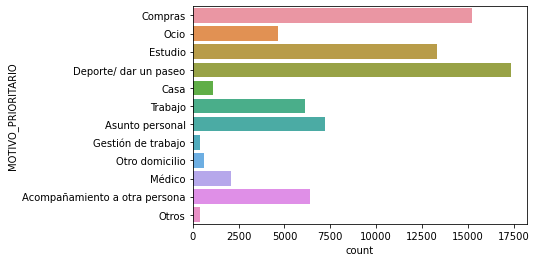

In [48]:
sns.countplot(y="MOTIVO_PRIORITARIO", data=ped)

<AxesSubplot:xlabel='count', ylabel='VNOPUBLICO'>

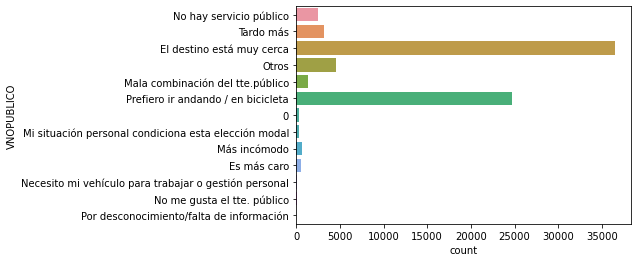

In [49]:
sns.countplot(y="VNOPUBLICO", data=ped)

<AxesSubplot:xlabel='count', ylabel='VNOPRIVADO'>

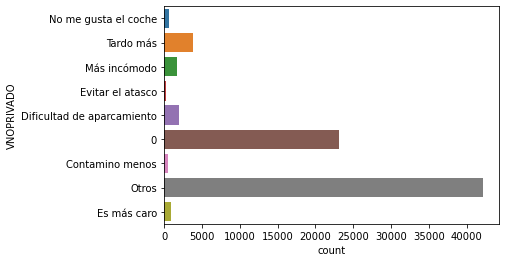

In [50]:
sns.countplot(y="VNOPRIVADO", data=ped,orient='v')

<AxesSubplot:xlabel='count', ylabel='C7ESTUD'>

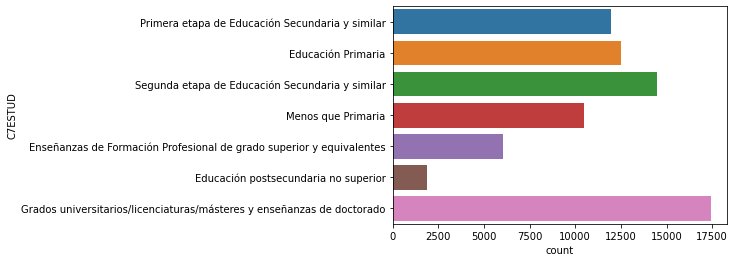

In [51]:
sns.countplot(y="C7ESTUD", data=ped,orient='v')

<AxesSubplot:xlabel='count', ylabel='C8ACTIV'>

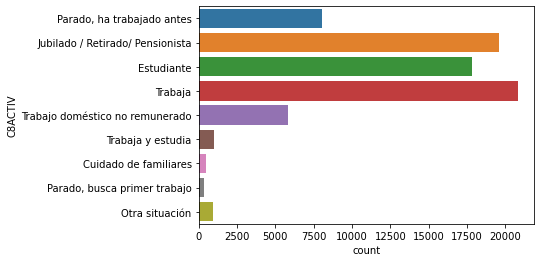

In [52]:
sns.countplot(y="C8ACTIV", data=ped,orient='v')

<AxesSubplot:xlabel='count', ylabel='VFRECUENCIA'>

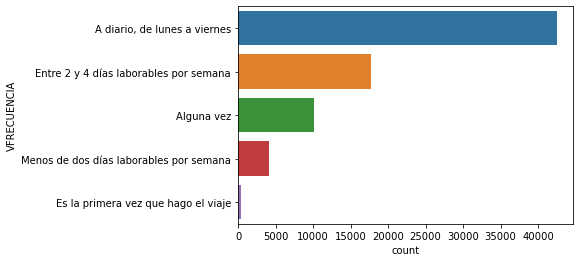

In [53]:
sns.countplot(y="VFRECUENCIA", data=ped,orient='v')

<AxesSubplot:xlabel='C2SEXO', ylabel='count'>

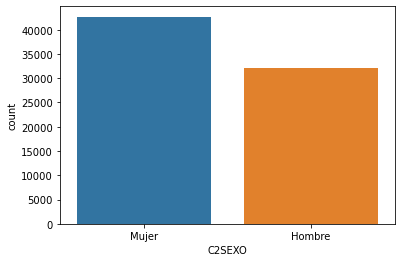

In [54]:
sns.countplot(x="C2SEXO", data=ped)

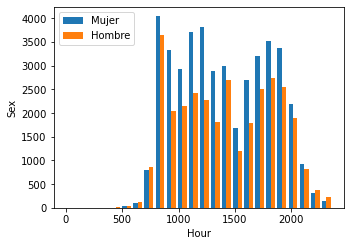

In [55]:
figure = plt.figure(figsize=(5.2,3.7))
plt.hist([ped[ped['C2SEXO']=='Mujer']['VORIHORAINI'], ped[ped['C2SEXO']=='Hombre']['VORIHORAINI']], stacked=False, bins=24, label=['Mujer','Hombre'])
plt.xlabel('Hour')
plt.ylabel('Sex')
plt.legend()

In [56]:
ped.MOTIVO_PRIORITARIO.unique()

array(['Compras', 'Ocio', 'Estudio', 'Deporte/ dar un paseo', 'Casa',
       'Trabajo', 'Asunto personal', 'Gestión de trabajo',
       'Otro domicilio', 'Médico', 'Acompañamiento a otra persona',
       'Otros'], dtype=object)

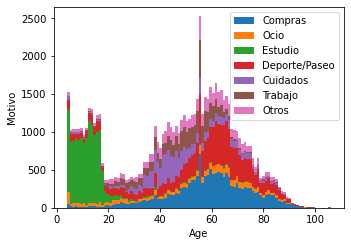

In [57]:
figure = plt.figure(figsize=(5.2,3.7))
plt.hist([ped[ped['MOTIVO_PRIORITARIO']=='Compras']['EDAD_FIN'],
          ped[ped['MOTIVO_PRIORITARIO']=='Ocio']['EDAD_FIN'],
          ped[ped['MOTIVO_PRIORITARIO']=='Estudio']['EDAD_FIN'],
          ped[ped['MOTIVO_PRIORITARIO']=='Deporte/ dar un paseo']['EDAD_FIN'],
          ped[ped['MOTIVO_PRIORITARIO'].isin(['Acompañamiento a otra persona','Médico'])]['EDAD_FIN'],
          ped[ped['MOTIVO_PRIORITARIO'].isin(['Casa','Trabajo','Gestión de trabajo'])]['EDAD_FIN'],
         ped[ped['MOTIVO_PRIORITARIO'].isin(['Asunto personal','Otro domicilio','Otros'])]['EDAD_FIN']],
         stacked=True, bins=100, label=['Compras','Ocio','Estudio','Deporte/Paseo','Cuidados','Trabajo','Otros'])
plt.xlabel('Age')
plt.ylabel('Motivo')
plt.legend()
#plt.savefig("C:\\Users\\manub\\DATA\\00-EXTERNO\MANU\TODOS_MOTIVO_EDAD.png")

In [58]:
ped_muj = ped.loc[ped['C2SEXO']=='Mujer']
ped_hom = ped.loc[ped['C2SEXO']=='Hombre']

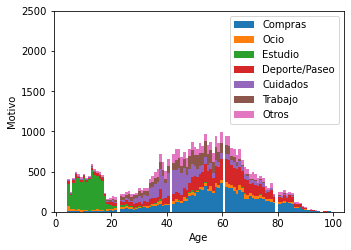

In [59]:
figure = plt.figure(figsize=(5.2,3.7))
axes = plt.gca()
axes.set_ylim([0,2500])
plt.hist([ped_muj[ped_muj['MOTIVO_PRIORITARIO']=='Compras']['EDAD_FIN'],
          ped_muj[ped_muj['MOTIVO_PRIORITARIO']=='Ocio']['EDAD_FIN'],
          ped_muj[ped_muj['MOTIVO_PRIORITARIO']=='Estudio']['EDAD_FIN'],
          ped_muj[ped_muj['MOTIVO_PRIORITARIO']=='Deporte/ dar un paseo']['EDAD_FIN'],
          ped_muj[ped_muj['MOTIVO_PRIORITARIO'].isin(['Acompañamiento a otra persona','Médico'])]['EDAD_FIN'],
          ped_muj[ped_muj['MOTIVO_PRIORITARIO'].isin(['Casa','Trabajo','Gestión de trabajo'])]['EDAD_FIN'],
         ped_muj[ped_muj['MOTIVO_PRIORITARIO'].isin(['Asunto personal','Otro domicilio','Otros'])]['EDAD_FIN']],
         stacked=True, bins=100, label=['Compras','Ocio','Estudio','Deporte/Paseo','Cuidados','Trabajo','Otros'])
plt.xlabel('Age')
plt.ylabel('Motivo')
plt.legend()
#plt.savefig("C:\\Users\\manub\\DATA\\00-EXTERNO\MANU\MUJERES_MOTIVO_EDAD.png")

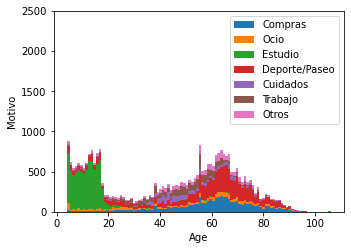

In [60]:
figure = plt.figure(figsize=(5.2,3.7))
axes = plt.gca()
axes.set_ylim([0,2500])
plt.hist([ped_hom[ped_hom['MOTIVO_PRIORITARIO']=='Compras']['EDAD_FIN'],
          ped_hom[ped_hom['MOTIVO_PRIORITARIO']=='Ocio']['EDAD_FIN'],
          ped_hom[ped_hom['MOTIVO_PRIORITARIO']=='Estudio']['EDAD_FIN'],
          ped_hom[ped_hom['MOTIVO_PRIORITARIO']=='Deporte/ dar un paseo']['EDAD_FIN'],
          ped_hom[ped_hom['MOTIVO_PRIORITARIO'].isin(['Acompañamiento a otra persona','Médico'])]['EDAD_FIN'],
          ped_hom[ped_hom['MOTIVO_PRIORITARIO'].isin(['Casa','Trabajo','Gestión de trabajo'])]['EDAD_FIN'],
         ped_hom[ped_hom['MOTIVO_PRIORITARIO'].isin(['Asunto personal','Otro domicilio','Otros'])]['EDAD_FIN']],
         stacked=True, bins=100, label=['Compras','Ocio','Estudio','Deporte/Paseo','Cuidados','Trabajo','Otros'])
plt.xlabel('Age')
plt.ylabel('Motivo')
plt.legend()
#plt.savefig("C:\\Users\\manub\\DATA\\00-EXTERNO\MANU\HOMBRES_MOTIVO_EDAD.png")

<AxesSubplot:xlabel='count', ylabel='C8ACTIV'>

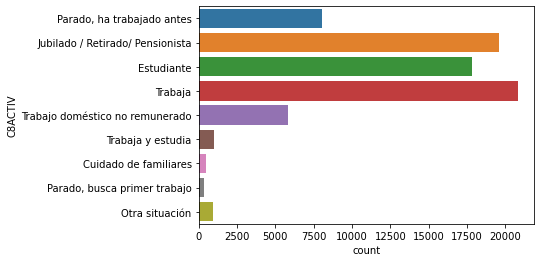

In [61]:
sns.countplot(y="C8ACTIV", data=ped,orient='v')

<AxesSubplot:>

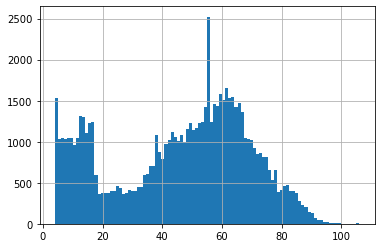

In [62]:
ped['EDAD_FIN'].hist(bins=100)

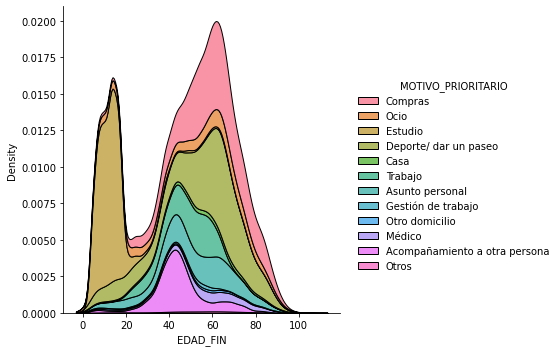

In [63]:
sns.displot(ped, x="EDAD_FIN", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack",)

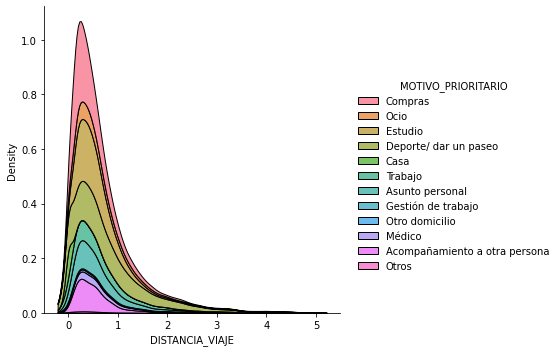

In [64]:
sns.displot(ped.loc[ped["DISTANCIA_VIAJE"]<5], x="DISTANCIA_VIAJE", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack")

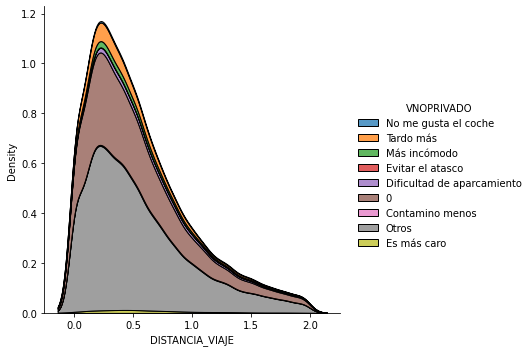

In [65]:
sns.displot(ped.loc[ped["DISTANCIA_VIAJE"]<2], x="DISTANCIA_VIAJE", hue="VNOPRIVADO", kind="kde", multiple="stack")

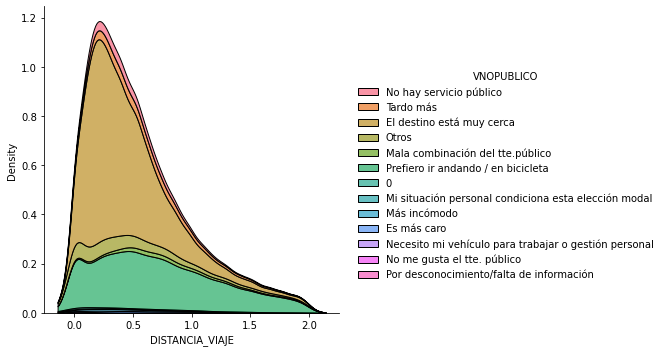

In [66]:
sns.displot(ped.loc[ped["DISTANCIA_VIAJE"]<2], x="DISTANCIA_VIAJE", hue="VNOPUBLICO", kind="kde", multiple="stack")

c:\Users\ManuBenito\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


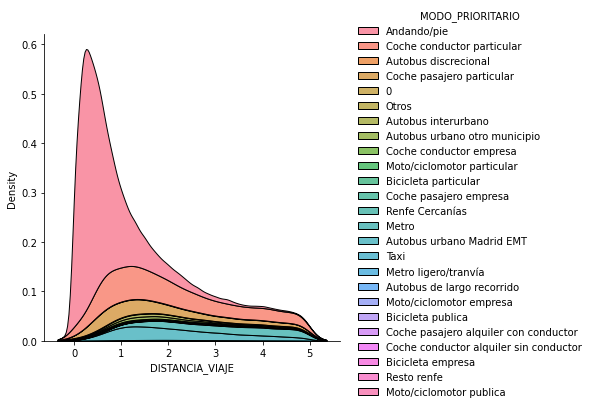

In [67]:
sns.displot(data.loc[data["DISTANCIA_VIAJE"]<5], x="DISTANCIA_VIAJE", hue="MODO_PRIORITARIO", kind="kde", multiple="stack")

c:\Users\ManuBenito\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


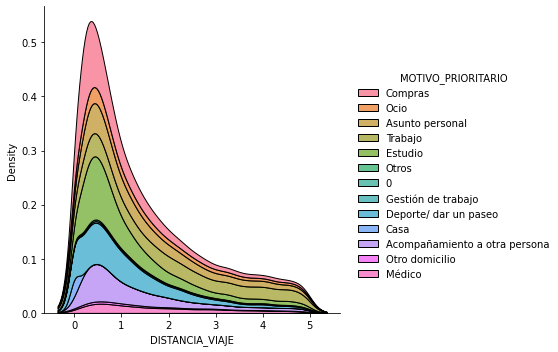

In [68]:
sns.displot(data.loc[data["DISTANCIA_VIAJE"]<5], x="DISTANCIA_VIAJE", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack")

## Zonas

In [69]:
zonas = gpd.read_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\mobility\edm2018\level0\spatialdata\ZonificacionZT1259.geojson")
zonas = zonas.to_crs({'init': 'epsg:25830'})
#zonas_point = zonas.copy()
#zonas_point['geometry'] = zonas_point['geometry'].representative_point()

c:\Users\ManuBenito\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [70]:
zonas.columns

Index(['FID', 'D_R', 'CD_ZT1259', 'ZT1259', 'SHAPE_Length', 'SHAPE_Area',
       'geometry'],
      dtype='object')

<AxesSubplot:>

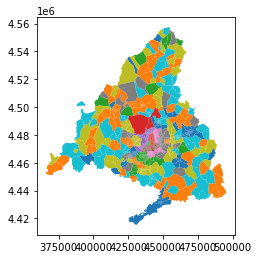

In [71]:
zonas.plot(column='ZT1259')

In [72]:
usos = gpd.read_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\landuse\catastro\level1\PORTALES_AMM_CDATA.shp")

In [73]:
parcelas = gpd.read_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\landuse\catastro\level1\PARCELAS_AMM_USOS.shp")

In [74]:
clc = gpd.read_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\landuse\clc\CLC18_AMM.shp")

In [75]:
clc = clc.loc[clc['Code_18'].isin(['111','112','121'])]

In [76]:
clc = clc.dissolve(by='Cod_Prov')

In [77]:
usos=usos.to_crs({'init': 'epsg:25830'})
parcelas=parcelas.to_crs({'init': 'epsg:25830'})
clc=clc.to_crs({'init': 'epsg:25830'})

c:\Users\ManuBenito\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [78]:
#res_intersection = gpd.overlay(parcelas, clc, how='intersection')
#res_intersection = res_intersection.dissolve(by='REFCAT',as_index=False)
#res_intersection.to_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\landuse\catastro\level1\developed.gpkg",driver='GPKG')

In [79]:
parcelas_developed = gpd.read_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\landuse\catastro\level1\developed.gpkg")

In [80]:
#parcelas_developed = res_intersection.copy()

In [81]:
parcelas_developed

,REFCAT,OBJECTID_1,PCAT1,PCAT2,MUNICIPIO,MASA,TIPO,PARCELA,VIA,NUMERO,...,Codigo,Texto,Provincia,Cod_CCAA,ComAutonom,Pais,AREA_MUN,'AMM,AMM,geometry
0,VK4800A,591978,160992,02,900,00006,1884180.167150304,591978,8864,210,...,28005,33.3267549393,0000602,13,Comunidad de Madrid,None,8802.649856,1,1,"POLYGON Z ((440007.172 4479860.536 0.000, 4400..."
1,VK4800A,624485,160992,04,900,00006,1884180.167150304,624485,8864,16,...,28005,39.4303397381,0000604,13,Comunidad de Madrid,None,8802.649856,1,1,"POLYGON Z ((440008.432 4479864.054 0.000, 4400..."
2,VK4800A,625881,160992,05,900,00006,1884180.167150304,625881,8864,23,...,28005,71.5044942185,0000605,13,Comunidad de Madrid,None,8802.649856,1,1,"POLYGON Z ((440012.184 4479831.888 0.000, 4400..."
3,VK4800A,625879,160992,06,900,00006,1884180.167150304,625879,8864,232,...,28005,53.5484877472,0000606,13,Comunidad de Madrid,None,8802.649856,1,1,"POLYGON Z ((439994.707 4479837.574 0.000, 4399..."
4,VK4800A,625883,160992,07,900,00006,1884180.167150304,625883,8864,19,...,28005,160.594553108,0000607,13,Comunidad de Madrid,None,8802.649856,1,1,"POLYGON Z ((440000.288 4479794.396 0.000, 4399..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308380,VK1799N,250615,160992,13,176,99999,1884180.167150304,250615,8864,13,...,28005,101.751696835,9999913,13,Comunidad de Madrid,9999913VK1799N,8802.649856,1,1,"POLYGON Z ((419797.577 4479716.628 0.000, 4197..."
308381,VK1799N,250616,160992,14,176,99999,1884180.167150304,250616,8864,14,...,28005,97.943877137,9999914,13,Comunidad de Madrid,9999914VK1799N,8802.649856,1,1,"POLYGON Z ((419812.348 4479731.208 0.000, 4197..."
308382,VK1799N,250617,160992,15,176,99999,1884180.167150304,250617,8864,1,...,28005,135.171123779,9999915,13,Comunidad de Madrid,9999915VK1799N,8802.649856,1,1,"POLYGON Z ((419831.668 4479748.089 0.000, 4198..."
308383,0000000,612574,160992,01,900,RA610,1884180.167150304,612574,8864,1,...,28005,74.66572776380001,RA61001,13,Comunidad de Madrid,RA610010000000,8802.649856,1,1,"POLYGON Z ((446340.788 4481238.493 0.000, 4463..."


In [82]:
parcelas_developed['area_ha']=(parcelas_developed['geometry'].area)/10000

In [83]:
parcelas_developed = parcelas_developed[['REFCAT','area_ha','geometry']]

In [84]:
#zonas_amm = zonas.loc[zonas['AMM']==1]
zonas_amm = zonas.copy()

In [85]:
#usos.loc[usos['PCAT'].isin(parcelas_developed['REFCAT'].unique())]

In [135]:
poblacion = pd.read_parquet(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\demographics\ine_adrh\ine_atlasrenta\level1_spain_ine_atlasrenta_census tract_2018.parquet")
geometry = gpd.read_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\spain\demographics\level1_geo_census tract_code_2018.gpkg")

In [136]:
poblacion = pd.merge(geometry,poblacion,on='census tract_code_2018',how='left',suffixes=('',"_x"))
poblacion = poblacion[poblacion['province_code_2018']=='28']


In [141]:
poblacion = poblacion[['Indicadores demográficos_units_Edad media de la población_Personas,   %,   Años_2018',
'Indicadores demográficos_units_Población_Personas,   %,   Años_2018',
'Indicadores demográficos_units_Porcentaje de hogares unipersonales_Personas,   %,   Años_2018',
'Indicadores demográficos_units_Porcentaje de población de 65 y más años_Personas,   %,   Años_2018',
'Indicadores demográficos_units_Porcentaje de población menor de 18 años_Personas,   %,   Años_2018',
'Indicadores demográficos_units_Tamaño medio del hogar_Personas,   %,   Años_2018',
'Indicadores de renta media y mediana_units_Renta bruta media por hogar_€_2018',
'Indicadores de renta media y mediana_units_Renta bruta media por persona_€_2018',
'Indicadores de renta media y mediana_units_Renta neta media por hogar_€_2018',
'Indicadores de renta media y mediana_units_Renta neta media por persona_€_2018',
'Indicadores de renta media y mediana_units_Media de la renta por unidad de consumo_€_2018',
'Indicadores de renta media y mediana_units_Mediana de la renta por unidad de consumo_€_2018',
'Indicadores de renta media y mediana_units_Renta mediana por hogar_€_2018','geometry']]

In [142]:
poblacion = poblacion.to_crs({'init': 'epsg:25830'})

c:\Users\ManuBenito\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [144]:
poblacion

,"Indicadores demográficos_units_Edad media de la población_Personas, %, Años_2018","Indicadores demográficos_units_Población_Personas, %, Años_2018","Indicadores demográficos_units_Porcentaje de hogares unipersonales_Personas, %, Años_2018","Indicadores demográficos_units_Porcentaje de población de 65 y más años_Personas, %, Años_2018","Indicadores demográficos_units_Porcentaje de población menor de 18 años_Personas, %, Años_2018","Indicadores demográficos_units_Tamaño medio del hogar_Personas, %, Años_2018",Indicadores de renta media y mediana_units_Renta bruta media por hogar_€_2018,Indicadores de renta media y mediana_units_Renta bruta media por persona_€_2018,Indicadores de renta media y mediana_units_Renta neta media por hogar_€_2018,Indicadores de renta media y mediana_units_Renta neta media por persona_€_2018,Indicadores de renta media y mediana_units_Media de la renta por unidad de consumo_€_2018,Indicadores de renta media y mediana_units_Mediana de la renta por unidad de consumo_€_2018,Indicadores de renta media y mediana_units_Renta mediana por hogar_€_2018,geometry
15586,-999.0,-999.0,-999.0,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,"MULTIPOLYGON (((446007.875 4552347.977, 446133..."
15587,38.9,1900.0,22.6,11.2,20.4,2.81,49396.0,17500.0,40230.0,14253.0,22257.0,19250.0,-999.0,"MULTIPOLYGON (((460243.759 4487756.134, 460322..."
15592,37.2,2421.0,22.6,9.6,23.2,2.83,44103.0,15444.0,36459.0,12767.0,19936.0,17850.0,-999.0,"MULTIPOLYGON (((457392.506 4486262.150, 457391..."
15597,42.0,1753.0,32.1,16.2,13.7,2.40,42057.0,17473.0,34373.0,14281.0,20712.0,17850.0,-999.0,"MULTIPOLYGON (((468720.769 4481373.599, 468695..."
15607,36.9,1992.0,20.4,12.3,26.3,2.96,33355.0,11113.0,28691.0,9559.0,15310.0,13650.0,-999.0,"MULTIPOLYGON (((417140.151 4451736.123, 416867..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36227,42.6,1967.0,13.9,17.9,16.4,2.88,39878.0,13700.0,33865.0,11634.0,18084.0,16450.0,-999.0,"MULTIPOLYGON (((428294.718 4464087.404, 428323..."
36239,42.9,1177.0,17.1,17.6,15.9,2.87,35839.0,12241.0,31035.0,10600.0,16290.0,15050.0,-999.0,"MULTIPOLYGON (((427799.588 4463874.747, 427781..."
36240,33.5,2234.0,15.0,4.2,33.3,3.04,39008.0,12810.0,32566.0,10694.0,17134.0,15750.0,-999.0,"MULTIPOLYGON (((428597.748 4460763.941, 428597..."
36241,33.0,2549.0,11.5,3.7,33.2,3.16,39002.0,12284.0,32691.0,10296.0,16657.0,15750.0,-999.0,"MULTIPOLYGON (((428307.322 4461027.068, 428309..."


<AxesSubplot:>

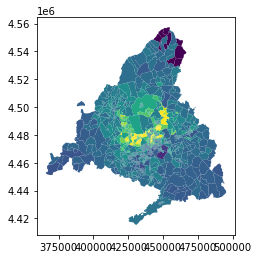

In [145]:
poblacion.plot(column='Indicadores de renta media y mediana_units_Media de la renta por unidad de consumo_€_2018')

In [99]:
usos_poblacion = gpd.sjoin(usos,poblacion,how='left',op='intersects')

<AxesSubplot:>

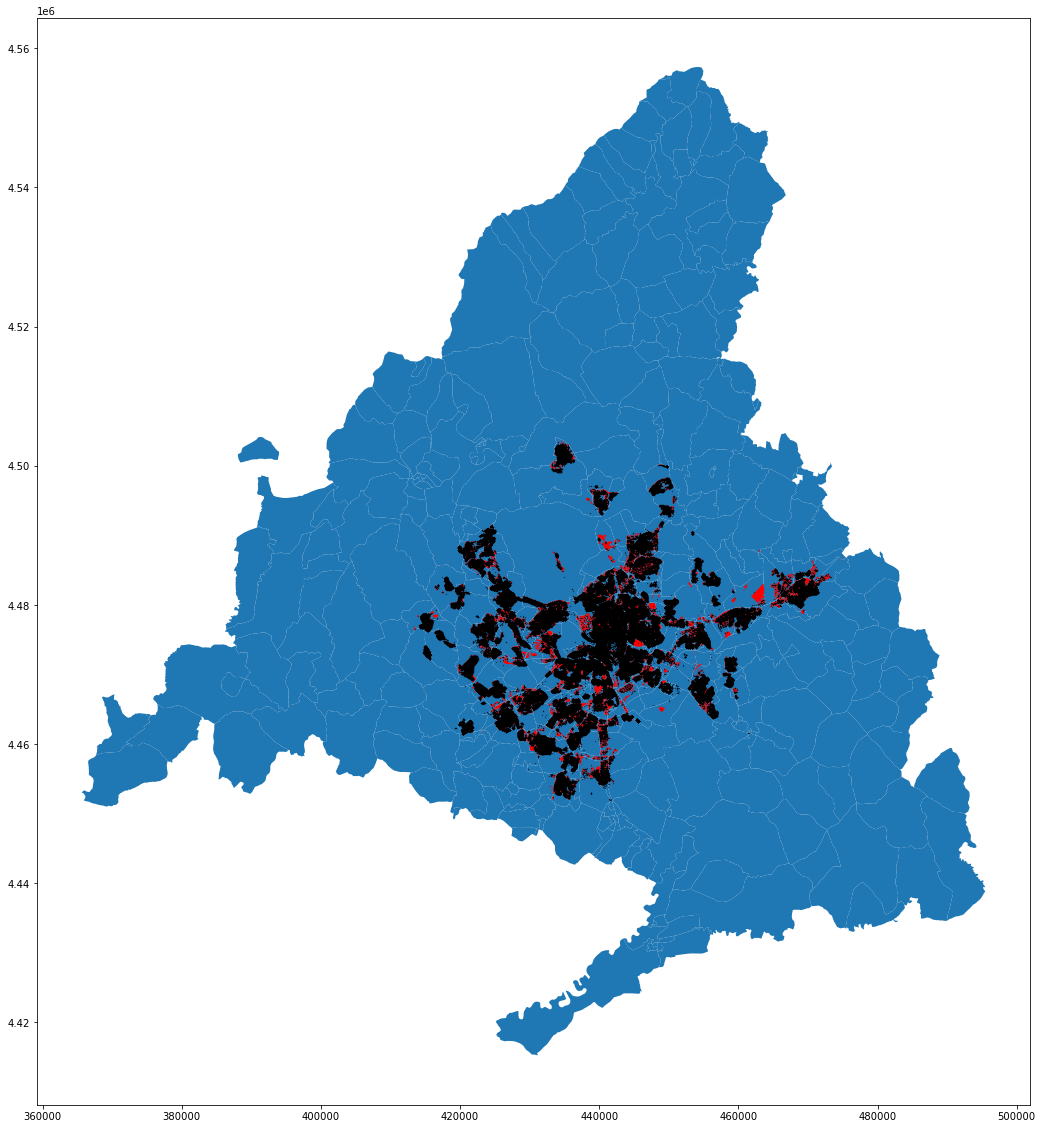

In [153]:
fig,ax = plt.subplots(figsize=(20,20))
usos_poblacion.plot(markersize=0.05,ax=ax,c='black',zorder=2)
zonas_amm.plot(ax=ax,zorder=0)
parcelas_developed.plot(ax=ax,zorder=1,color='red')

In [161]:
usos_poblacion = usos_poblacion.replace(-999,np.nan)

In [162]:
usos_poblacion['POBLACION_TOTAL'] = usos_poblacion['NV'] * usos_poblacion['Indicadores demográficos_units_Tamaño medio del hogar_Personas,   %,   Años_2018']
usos_poblacion['TAMANO HOGAR'] = usos_poblacion['Indicadores demográficos_units_Tamaño medio del hogar_Personas,   %,   Años_2018']
usos_poblacion['RENTA_TOTAL'] = usos_poblacion['Indicadores de renta media y mediana_units_Renta bruta media por persona_€_2018'] * usos_poblacion['POBLACION_TOTAL']
usos_poblacion['MENORES_TOTAL'] = (usos_poblacion['POBLACION_TOTAL']*usos_poblacion['Indicadores demográficos_units_Porcentaje de población menor de 18 años_Personas,   %,   Años_2018'])/100
usos_poblacion['MAYORES_TOTAL'] = (usos_poblacion['POBLACION_TOTAL']*usos_poblacion['Indicadores demográficos_units_Porcentaje de población de 65 y más años_Personas,   %,   Años_2018'])/100

In [170]:
len(usos_poblacion)

344252

In [172]:
#usos_poblacion.drop(columns=['index_right'],inplace=True)

In [173]:
zonas_usos_poblacion= gpd.sjoin(zonas_amm,usos_poblacion,op='intersects',how='right')

In [ ]:
map_usos = {'Viviendas':['V'],'Compras':['C'],'Ocio':['G'],'Estudio':['E'],'Deporte/Paseo':['K'],'Cuidados':['Y','E'],'Trabajo':['C','O','P']}

In [174]:
zonas_usos_poblacion = zonas_usos_poblacion.groupby('ZT1259').sum()[['NA', 'NB', 'NC',
       'NE', 'NG', 'NI', 'NJ', 'NK', 'NM', 'NO', 'NP', 'NR', 'NT', 'NV', 'NY',
       'NZ', 'SA', 'SB', 'SC', 'SE', 'SG', 'SI', 'SJ', 'SK', 'SM', 'SO', 'SP',
       'SR', 'ST', 'SV', 'SY', 'SZ', 'SCONS','POBLACION_TOTAL','RENTA_TOTAL',
       'MENORES_TOTAL', 'MAYORES_TOTAL']]


In [175]:
zonas_usos_poblacion['RENTA_MEDIA'] = zonas_usos_poblacion['RENTA_TOTAL'] / zonas_usos_poblacion['POBLACION_TOTAL']
zonas_usos_poblacion['PROP_MAYORES'] = (zonas_usos_poblacion['MAYORES_TOTAL']*100) / zonas_usos_poblacion['POBLACION_TOTAL']
zonas_usos_poblacion['PROP_MENORES'] = (zonas_usos_poblacion['MENORES_TOTAL']*100) / zonas_usos_poblacion['POBLACION_TOTAL']

<AxesSubplot:>

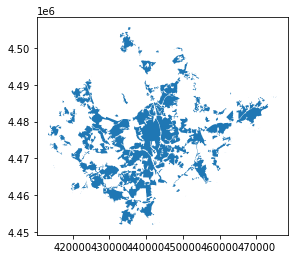

In [178]:
clc.plot()

In [179]:
clc = clc[['geometry']]

In [180]:
developed = gpd.overlay(zonas_amm, clc, how='intersection')

In [181]:
developed['DEVELOPED_AREA'] = developed['geometry'].area/10000

In [182]:
developed_area = developed.groupby('ZT1259').sum()[['DEVELOPED_AREA']]

In [187]:
developed_area.reset_index(inplace=True)

In [188]:
zonas_usos_poblacion

,NA,NB,NC,NE,NG,NI,NJ,NK,NM,NO,...,SY,SZ,SCONS,POBLACION_TOTAL,RENTA_TOTAL,MENORES_TOTAL,MAYORES_TOTAL,RENTA_MEDIA,PROP_MAYORES,PROP_MENORES
ZT1259,,,,,,,,,,,,,,,,,,,,,
005-001,145.0,0.0,35.0,0.0,5.0,570.0,0.0,2.0,23.0,641.0,...,388.0,0.0,1540162,5.70,7.563900e+04,0.87210,1.02600,13270.000000,18.000000,15.300000
005-002,424.0,0.0,7.0,0.0,1.0,167.0,0.0,4.0,1.0,40.0,...,0.0,0.0,499841,1568.61,2.528129e+07,257.25204,183.52737,16117.000000,11.700000,16.400000
005-003,3069.0,0.0,148.0,2.0,1.0,25.0,0.0,10.0,1.0,122.0,...,42817.0,0.0,1265681,17307.85,2.687636e+08,4691.87080,933.26521,15528.424305,5.392150,27.108340
005-004,0.0,0.0,1.0,153.0,2.0,53.0,0.0,2.0,0.0,13.0,...,92422.0,0.0,392388,2.85,6.202740e+04,0.72960,0.20805,21764.000000,7.300000,25.600000
005-005,4.0,0.0,13.0,1.0,2.0,43.0,0.0,3.0,1.0,6.0,...,0.0,0.0,531677,0.00,0.000000e+00,0.00000,0.00000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903-007,2586.0,0.0,95.0,3.0,1.0,0.0,0.0,9.0,0.0,7.0,...,150.0,0.0,479002,7358.47,1.748703e+08,1406.34678,780.13726,23764.490114,10.601895,19.111946
903-008A,1148.0,0.0,374.0,7.0,0.0,0.0,0.0,4.0,0.0,38.0,...,8131.0,0.0,815151,10444.86,2.644460e+08,1766.67484,1469.75298,25318.289478,14.071543,16.914299
903-008B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,76171,0.00,0.000000e+00,0.00000,0.00000,NaN,NaN,NaN


In [119]:
zonas_usos_poblacion.fillna(0,inplace=True)

In [ ]:
'''
wm = lambda x: np.average(x, weights=poblacion.loc[x.index, "Población_2017"])

wmeans1 = poblacion.groupby(["ZT1259"]).agg(Edad_Media_2017=("Edad media de la población_2017", wm))
wmeans2 = poblacion.groupby(["ZT1259"]).agg(Jovenes_2017=("Porcentaje de población menor de 18 años_2017", wm))
wmeans3 = poblacion.groupby(["ZT1259"]).agg(Mayores_2017=("Porcentaje de población de 65 y más años_2017", wm))
'''                                  
#FALTA HACER LA WEIGHTED MEAN DE EDAD

In [ ]:
developed_area

In [ ]:
zonas_usos_poblacion

In [189]:
zonas_data = pd.merge(zonas_amm,zonas_usos_poblacion,on='ZT1259',how='left')

In [190]:
zonas_data = pd.merge(zonas_data,developed_area,on='ZT1259',how='left')

In [ ]:
zonas_data

In [195]:
zonas_data['POBLACION_TOTAL'].fillna(0,inplace=True)
zonas_data['DEVELOPED_AREA'].fillna(0,inplace=True)

<AxesSubplot:>

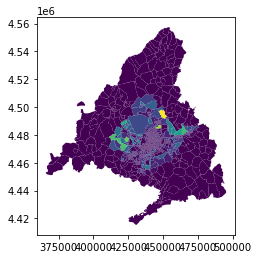

In [197]:
zonas_data.plot(column='DEVELOPED_AREA')

In [198]:
zonas_data['DENSIDAD'] =zonas_data['POBLACION_TOTAL'] / zonas_data['DEVELOPED_AREA']

In [199]:
zonas_data['DENSIDAD'].fillna(0,inplace=True)

In [200]:
def simpson_diversity(row,fields):
    all_species = sum([row[a] for a in fields])
    diversity = 1 - sum([(row[a]/all_species)**2 for a in fields if row[a]!=0])
    row['DIVERSIDAD'] = diversity
    return row

In [201]:
uses = ['SC','SE','SG','SK','SP','SR','ST','SV','SY']

In [202]:
for a in uses:
    zonas_data[a].fillna(0,inplace=True)

In [203]:
zonas_data = zonas_data.apply(lambda row:simpson_diversity(row,uses),axis=1)

In [204]:
zonas_data.loc[zonas_data['DIVERSIDAD']==1,'DIVERSIDAD'] = 0

In [120]:
zonas_data.to_file(r"C:\Users\ManuBenito\Documents\Walknet-DataLake\sources\zonas_data.gpkg",driver='GPKG')

In [205]:
zonas_data.columns

Index(['FID', 'D_R', 'CD_ZT1259', 'ZT1259', 'SHAPE_Length', 'SHAPE_Area',
       'geometry', 'NA', 'NB', 'NC', 'NE', 'NG', 'NI', 'NJ', 'NK', 'NM', 'NO',
       'NP', 'NR', 'NT', 'NV', 'NY', 'NZ', 'SA', 'SB', 'SC', 'SE', 'SG', 'SI',
       'SJ', 'SK', 'SM', 'SO', 'SP', 'SR', 'ST', 'SV', 'SY', 'SZ', 'SCONS',
       'POBLACION_TOTAL', 'RENTA_TOTAL', 'MENORES_TOTAL', 'MAYORES_TOTAL',
       'RENTA_MEDIA', 'PROP_MAYORES', 'PROP_MENORES', 'DEVELOPED_AREA',
       'DENSIDAD', 'DIVERSIDAD'],
      dtype='object')

In [ ]:
zonas_data.columns

In [213]:
zonas_data = zonas_data[['ZT1259',
       'NA', 'NB', 'NC', 'NE', 'NG', 'NI', 'NJ', 'NK', 'NM', 'NO',
       'NP', 'NR', 'NT', 'NV', 'NY', 'NZ', 'SA', 'SB', 'SC', 'SE', 'SG', 'SI',
       'SJ', 'SK', 'SM', 'SO', 'SP', 'SR', 'ST', 'SV', 'SY', 'SZ', 'SCONS',
       'POBLACION_TOTAL', 'RENTA_TOTAL', 'MENORES_TOTAL', 'MAYORES_TOTAL',
       'RENTA_MEDIA', 'PROP_MAYORES', 'PROP_MENORES', 'DEVELOPED_AREA',
       'DENSIDAD', 'DIVERSIDAD']]

In [217]:
data_zonas = pd.merge(data,zonas_data.rename(columns={c:f'{c}_origin' for c in zonas_data.columns if c !='ZT1259'}),left_on='VORIZT1259',right_on='ZT1259',how='left')
data_zonas = pd.merge(data_zonas,zonas_data.rename(columns={c:f'{c}_destination' for c in zonas_data.columns if c !='ZT1259'}),left_on='VDESZT1259',right_on='ZT1259',how='left')

In [220]:
for c in data_zonas.columns:
    print(c)

Unnamed: 0
ID_HOGAR
CODMUNI
NOMMUNI
CODPROV
NOMPROV
ZT1259_x
CZ208
ELE_HOGAR_NUEVO
TIPO_ENCUESTA
A1PER
A2PER4
B1NVE
V1B11TIPO
V1B12CARB
V1B13EST
V2B11TIPO1
V2B12CARB1
V2B13EST1
V3B11TIPO1
V3B12CARB1
V3B13EST1
V4B11TIPO1
V4B12CARB1
V4B13EST1
V5B11TIPO1
V5B12CARB1
V5B13EST1
N_MIEMBROS_POR_HOGAR
N_VIAJES_POR_HOGAR
ID_IND
C2SEXO
EDAD_FIN
ELE_G_POND
C4NAC
C5CAM
C6CARNE
C7ESTUD
C8ACTIV
C9PROF
C10SECTOR
C13TARJETA
C14ABONO
DDIA
DMES
DANNO
DIASEM
DNOVIAJO
C11ZT1259
C12ZT1259
CPMR
ID_VIAJE
VORI
VORIHORAINI
VDES
VDESHORAFIN
VFRECUENCIA
VVEHICULO
VNOPRIVADO
VNOPUBLICO
VORIZT1259
VDESZT1259
N_ETAPAS_POR_VIAJE
MOTIVO_PRIORITARIO
DISTANCIA_VIAJE
MODO_PRIORITARIO
ELE_G_POND_ESC2
ZT1259_y
NA_origin
NB_origin
NC_origin
NE_origin
NG_origin
NI_origin
NJ_origin
NK_origin
NM_origin
NO_origin
NP_origin
NR_origin
NT_origin
NV_origin
NY_origin
NZ_origin
SA_origin
SB_origin
SC_origin
SE_origin
SG_origin
SI_origin
SJ_origin
SK_origin
SM_origin
SO_origin
SP_origin
SR_origin
ST_origin
SV_origin
SY_origin
SZ_origi

In [ ]:
sns.displot(data_zonas.loc[data_zonas["DISTANCIA_VIAJE"]<5], x="DIVERSIDAD", hue="MODO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
sns.displot(data_zonas.loc[(data_zonas["DISTANCIA_VIAJE"]<5)&(data_zonas["DENSIDAD"]<1000)], x="DENSIDAD", hue="MODO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
sns.displot(data_zonas.loc[data_zonas["DISTANCIA_VIAJE"]<5], x="DIVERSIDAD", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
sns.displot(data_zonas.loc[(data_zonas["DISTANCIA_VIAJE"]<5)&(data_zonas["DENSIDAD"]<1000)], x="DENSIDAD", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
ped = data_zonas.loc[data_zonas['MODO_PRIORITARIO'] =='Andando/pie']

In [ ]:
sns.displot(ped.loc[(ped["DISTANCIA_VIAJE"]<5)&(ped["DENSIDAD"]<1000)], x="DENSIDAD", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
sns.displot(ped.loc[ped["DISTANCIA_VIAJE"]<5], x="DIVERSIDAD", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
ped.columns

In [ ]:
sns.displot(ped.loc[(ped["DISTANCIA_VIAJE"]<5)&(ped["DENSIDAD"]<1000)], x="DENSIDAD", hue="MOTIVO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
sns.displot(data_zonas, x="RENTA_MEDIA", hue="MODO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
sns.displot(data_zonas, x="PROP_MENORES", hue="MODO_PRIORITARIO", kind="kde", multiple="stack")

In [ ]:
d = {'Coche conductor particular': 'Coche',
 'Andando/pie': 'Andando',
 'Autobus interurbano': 'Autobus',
 'Autobus discrecional': 'Autobus',
 'Coche pasajero particular': 'Coche',
 0: 'S/D',
 'Otros': 'S/D',
 'Metro': 'Metro/Ferrocarril',
 'Autobus urbano otro municipio': 'Autobus',
 'Renfe Cercanías': 'Metro/Ferrocarril',
 'Coche conductor empresa': 'Coche',
 'Moto/ciclomotor particular': 'Moto',
 'Bicicleta particular': 'Bicicleta',
 'Coche pasajero empresa': 'Coche',
 'Autobus urbano Madrid EMT': 'Autobus',
 'Resto renfe': 'Metro/Ferrocarril',
 'Taxi': 'Coche',
 'Metro ligero/tranvía': 'Metro/Ferrocarril',
 'Coche pasajero alquiler con conductor': 'Coche',
 'Autobus de largo recorrido': 'Autobus',
 'Coche conductor alquiler sin conductor': 'Coche',
 'Moto/ciclomotor empresa': 'Moto',
 'Bicicleta publica': 'Bicicleta',
 'Bicicleta empresa': 'Bicicleta',
 'Moto/ciclomotor publica': 'Moto'}

In [ ]:
data_zonas['MODO_SIMPLIFICADO'] = data_zonas['MODO_PRIORITARIO'].replace(d)

In [ ]:
m ={'Trabajo': 'Trabajo',
 'Compras': 'Compras',
 'Ocio': 'Deporte/ Paseo / Ocio',
 'Asunto personal': 'Otros',
 'Estudio': 'Estudio',
 'Otros': 'Otros',
 0: 'Otros',
 'Gestión de trabajo': 'Trabajo',
 'Deporte/ dar un paseo': 'Deporte/ Paseo / Ocio',
 'Médico': 'Cuidados',
 'Casa': 'Otros',
 'Otro domicilio': 'Otros',
 'Acompañamiento a otra persona': 'Cuidados'}

In [ ]:
data_zonas['MOTIVO_SIMPLIFICADO'] = data_zonas['MOTIVO_PRIORITARIO'].replace(m)

In [ ]:
sns.displot(data_zonas.loc[data_zonas['DISTANCIA_VIAJE']<5], x="DIVERSIDAD", hue="MOTIVO_SIMPLIFICADO", kind="kde", multiple="stack")

In [ ]:
df = pd.DataFrame({'value': np.random.randint(1, 80, 20)}) 
df['group'] = pd.cut(df.value,
                     bins=[0, 5, 31, 51, 80],
                     labels=["very short", "short", "long", "very long"]

In [ ]:
l = list(itertools.combinations(zonas.keys(),2))

In [ ]:
l = ["/".join(list(t)) for t in l]
p = ["/".join([m,m])for m in zonas.keys()]

In [ ]:
p

In [ ]:
lineas = {}
puntos = {}
for el in l:
    l1 = el.split("/")[0]
    l2 = el.split("/")[1]
    line = LineString([zonas[l1],zonas[l2]])
    lineas.update({el:line})
for el in p:
    p0 = el.split("/")[0]
    point = zonas[p0]
    puntos.update({el:point})

In [ ]:
z = pd.DataFrame.from_dict(lineas,orient='index')
x = pd.DataFrame.from_dict(puntos,orient='index')

In [ ]:
d['MODO_PRIORITARIO'].unique()

In [ ]:
#activos = d.loc[d['MODO_PRIORITARIO'].isin(["'24. Andando/pie '"])]
#activos = d.loc[d['MODO_PRIORITARIO'].isin(["'24. Andando/pie '","'21. Bicicleta publica'","'22. Bicicleta empresa'","'20. Bicicleta particular'"])]
#activos = d.loc[d['MODO_PRIORITARIO'].isin(["'11. Coche conductor particular'","'14. Coche pasajero particular'","'12. Coche conductor empresa'","'10. Taxi '","'17. Moto/ciclomotor particular'","'10. Taxi '","'16. Coche pasajero alquiler con conductor'","'13. Coche conductor alquiler sin conductor'","'19. Moto/ciclomotor empresa'","'18. Moto/ciclomotor publica'"])]
activos = d.loc[d['MODO_PRIORITARIO'].isin(["'2. Autobus interurbano '", "'8. Autobus discrecional '","'3. Autobus urbano otro municipio '","'6. Autobus urbano Madrid EMT '","'9. Autobus de largo recorrido '"])]
#activos = d.loc[d['MODO_PRIORITARIO'].isin(["'4. Metro '","'1. Renfe Cercanías '","'7. Resto renfe '","'5. Metro ligero/tranvía '"])]

In [ ]:
co = activos.groupby(['LINEA']).count()
co['COUNT'] = co['ID_HOGAR']
co = co[['COUNT']]
dis = activos.groupby(['LINEA']).mean()
dis = dis[['DISTANCIA_VIAJE']]

In [ ]:
#co.reset_index(inplace=True)
#dis.reset_index(inplace=True)

In [ ]:
z['LINEA']=z.index
z['geometry'] = z[0]
#z.reset_index(inplace=True)
z=z[['LINEA','geometry']]
x['LINEA']=x.index
x['geometry'] = x[0]
#x.reset_index(inplace=True)
x=x[['LINEA','geometry']]

In [ ]:
#lfin = pd.concat([z,co,dis],axis=1)
#pfin = pd.concat([x,co,dis],axis=1)

In [ ]:
lfin = pd.merge(z,co,left_index=True,right_index=True)
lfin = pd.merge(lfin,dis,left_index=True,right_index=True)

In [ ]:
pfin = pd.merge(x,co,left_index=True,right_index=True)
pfin = pd.merge(pfin,dis,left_index=True,right_index=True)

In [ ]:
geo_lfin = gpd.GeoDataFrame(lfin,geometry='geometry',crs='epsg:3857')
geo_pfin = gpd.GeoDataFrame(pfin,geometry='geometry',crs='epsg:3857')

In [ ]:
zonas = gpd.read_file("C:\\Users\\manub\\DATA\\00-EXTERNO\\MANU\\ZonificacionZT1259-shp\\ZonificacionZT1259.shp")
#Visualizamos el dataset
fig, ax = plt.subplots(figsize =(10,10))
zonas.plot(ax=ax,color='black',linewidth=1)
geo_lfin.plot(ax=ax,color='aqua',linewidth=geo_lfin['COUNT']/20,scheme='quantiles',zorder=1)
geo_pfin.plot(ax=ax,color='white',markersize=geo_pfin['COUNT']/5,zorder=2)
#plt.grid(True,color='pink', linestyle='-', linewidth=0.7)
ax.axis("off")
plt.tight_layout()
plt.savefig("C:\\Users\\manub\\DATA\\00-EXTERNO\\MANU\\bus.jpeg",dpi=300)
plt.show();
plt.clf()

#gold,lawngreen,aqua,deeppink